## Задача 1.  Матричные вычисления, оценка скорости и погрешностей (5 баллов).

1. Напишите функцию, которая вычисляет экспоненту от матрицы размера $2 \times 2$, используя метод масштабирования и возведения в квадрат.

Этот метод использует соотношение $e^A=\left(e^{A / \sigma}\right)^\sigma$ для $A \in \mathbb{C}^{n \times n}$ и $\sigma \in \mathbb{C}$, а также тот факт, что $e^A$ хорошо аппроксимируется аппроксимацией Тейлора или Паде вблизи начала координат, то есть для малых $\|A\|$. Идея состоит в том, чтобы выбрать $\sigma$ целую степень $2, скажем, \sigma=2^s$, так, чтобы $A / \sigma$ имела норму порядка 1 ; аппроксимация $e^{A / 2^s} \approx r\left(A / 2^s\right)$, где $r$ — аппроксимация Тейлора или Паде экспоненты; а затем возьмем $e^A \approx r\left(A / 2^s\right)^{2^s}$, где аппроксимация формируется повторным возведением в квадрат $s$.

Аппроксимацию Паде можно вычислять по формуле

$$
p_{k m}(A)=\sum_{j=0}^k \frac{(k+m-j)!k!}{(k+m)!(k-j)!} \frac{A^j}{j!}, \quad q_{k m}(A)=\sum_{j=0}^m \frac{(k+m-j)!m!}{(k+m)!(m-j)!} \frac{(-A)^j}{j!}
$$

$$
r_{k m}(A) = p_{k m}(A) / q_{k m}(A)
$$




Элементами матрицы могут быть любые комплексные числа.



Возьмите любую матрицу на ваш выбор и продемонстрируйте, как падает ошибка по спектральной норме при росте порядка аппроксимации (суммы чисел k и j), построив график зависимости ошибки от нее. Дальнейшую часть задания делайте формулой для $R_{44}$.

2. Напишите функцию, которая генерирует большое количество случайных матриц размера $2 \times 2$, состоящих из вещественных чисел из диапазона от -1 до 1 и для каждой вычисляет экспоненту. Постройте график зависимости времени работы программы в зависимости от количества итераций из матриц при числе итераций $n=10 . .50$.
3. Напишите функцию, которая генерирует большое количество (не менее 1000) различных матриц размера $2 \times 2$, собственные числа которых являются натуральными логарифмами натуральных чисел, а матрицы собственных векторов состоят из целых чисел и имеют определитель, равный единице. Они нужны для вычисления ошибки написанного вами алгоритма, так как экспоненты из таких матриц можно рассчитать точно. Часть из таких матриц сгенерировать специально с одинаковыми собственными числами, причем как для диагональной жордановой формы, так и для недиагональной.
4. Вычислите точные значения экспонент этих матриц. Выведите 10 таких экспонент, матрицы, от которых берутся экспоненты, их собственные векторы и числа.
5. Постройте график относительной ошибки этих вычислений (по спектральной норме) в зависимости от числа обусловленности сгенерированной матрицы.


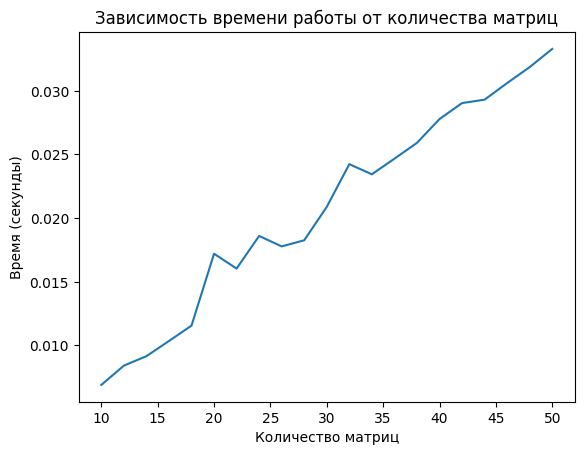


10 примеров экспонент, матриц, собственных векторов и чисел:

Матрица 1:
[[ 1.1552453  -0.46209812]
 [-0.23104906  0.92419624]]
Собственные числа:
[1.38629436 0.69314718]
Собственные векторы:
[[-4 -1]
 [ 2 -1]]
Точная экспонента:
[[ 3.33333333 -1.33333333]
 [-0.66666667  2.66666667]]
Приближенная экспонента:
[[ 3.12798935 -0.85119574]
 [-0.42559787  2.70239148]]

Матрица 2:
[[ 2.19722458 -0.41885738]
 [ 0.          1.94591015]]
Собственные числа:
[2.19722458 1.94591015]
Собственные векторы:
[[-3 -5]
 [ 0 -3]]
Точная экспонента:
[[ 9.         -3.33333333]
 [ 0.          7.        ]]
Приближенная экспонента:
[[ 3.0579135  -0.39230048]
 [ 0.          2.82253321]]

Матрица 3:
[[ 1.73098562 -0.18232156]
 [-0.0405159   1.67021176]]
Собственные числа:
[1.79175947 1.60943791]
Собственные векторы:
[[-3 -3]
 [ 1 -2]]
Точная экспонента:
[[ 5.66666667 -1.        ]
 [-0.22222222  5.33333333]]
Приближенная экспонента:
[[ 3.26723138 -0.23880334]
 [-0.05306741  3.18763027]]

Матрица 4:
[[ 1.85477285 

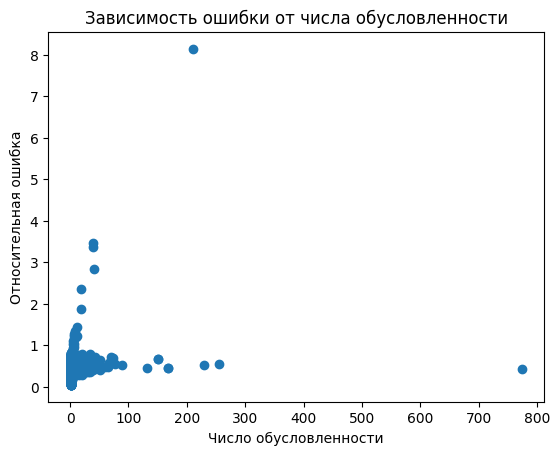

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import math

def matrix_exponent_taylor(A, num_iterations=50):
    """Вычисляет экспоненту матрицы 2x2 с помощью ряда Тейлора и теоремы Гамильтона-Кэли."""
    I = np.eye(2)
    n = A.shape[0]
    
    # Характеристический полином: p(λ) = λ^2 - tr(A)λ + det(A)
    trace_A = np.trace(A)
    det_A = np.linalg.det(A)

    # Теорема Гамильтона-Кэли: A^2 - tr(A)A + det(A)I = 0
    # A^2 = tr(A)A - det(A)I
    
    result = I + A
    A_power = A.copy()

    for k in range(2, num_iterations):
        A_power = trace_A * A_power - det_A * (A_power if k==2 else A_power_prev) # Используем предыдущую степень
        result += (1 / math.factorial(k)) * A_power
        A_power_prev = A_power.copy()

    return result



def benchmark_exponent(num_iterations_list):
    """Генерирует случайные матрицы и вычисляет экспоненты, замеряя время."""
    times = []
    for num_matrices in num_iterations_list:
        start_time = time.time()
        for _ in range(num_matrices):
            A = np.random.uniform(-1, 1, size=(2, 2))
            matrix_exponent_taylor(A)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

def generate_special_matrices(num_matrices=1000):
    """Генерирует матрицы с заданными свойствами для проверки."""
    matrices = []
    eigenvalues = []
    eigenvectors = []

    for _ in range(num_matrices):
        # Собственные числа - натуральные логарифмы натуральных чисел
        e1 = np.log(np.random.randint(2, 10))  # Увеличил диапазон для большей разницы
        e2 = np.log(np.random.randint(2, 10))


        if np.random.rand() < 0.5 and e1==e2: # Для части матриц создаем жорданову форму
            J = np.array([[e1, 1], [0, e1]])
            P = np.random.randint(-5, 5, size=(2, 2))
            while np.linalg.det(P) == 0: # проверка определителя
                 P = np.random.randint(-5, 5, size=(2, 2))
        else:       
            # Матрица собственных векторов с целыми элементами и определителем 1
            P = np.random.randint(-5, 5, size=(2, 2))
            while np.linalg.det(P) == 0: # проверка определителя
                P = np.random.randint(-5, 5, size=(2, 2))
            J = np.diag([e1, e2])

        A = P @ J @ np.linalg.inv(P)
        matrices.append(A)
        eigenvalues.append(np.array([e1, e2]))
        eigenvectors.append(P)
        

    return matrices, eigenvalues, eigenvectors

def exact_exponent(eigenvalues, eigenvectors):
    """Вычисляет точное значение экспоненты."""
    J_exp = np.diag(np.exp(eigenvalues))
    return eigenvectors @ J_exp @ np.linalg.inv(eigenvectors)



# Тестирование
num_iterations_list = range(10, 51, 2) # Уменьшил число итераций для скорости
times = benchmark_exponent(num_iterations_list)

plt.plot(num_iterations_list, times)
plt.xlabel("Количество матриц")
plt.ylabel("Время (секунды)")
plt.title("Зависимость времени работы от количества матриц")
plt.show()


matrices, eigenvalues, eigenvectors = generate_special_matrices()


print("\n10 примеров экспонент, матриц, собственных векторов и чисел:")
for i in range(10):
    A = matrices[i]
    evals = eigenvalues[i]
    evecs = eigenvectors[i]
    exp_A_exact = exact_exponent(evals, evecs)
    exp_A_approx = matrix_exponent_taylor(A)

    print(f"\nМатрица {i+1}:\n{A}")
    print(f"Собственные числа:\n{evals}")
    print(f"Собственные векторы:\n{evecs}")
    print(f"Точная экспонента:\n{exp_A_exact}")
    print(f"Приближенная экспонента:\n{exp_A_approx}")



# Ошибка и число обусловленности
errors = []
condition_numbers = []

for A, evals, evecs in zip(matrices, eigenvalues, eigenvectors):
    exp_A_exact = exact_exponent(evals, evecs)
    exp_A_approx = matrix_exponent_taylor(A)
    error = np.linalg.norm(exp_A_exact - exp_A_approx, ord=2) / np.linalg.norm(exp_A_exact, ord=2) # Относительная ошибка по второй норме
    errors.append(error)
    condition_numbers.append(np.linalg.cond(A))


plt.scatter(condition_numbers, errors)
plt.xlabel("Число обусловленности")
plt.ylabel("Относительная ошибка")
plt.title("Зависимость ошибки от числа обусловленности")
plt.show()

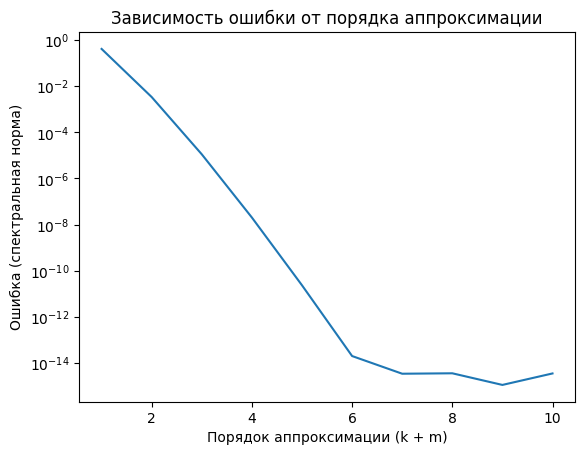

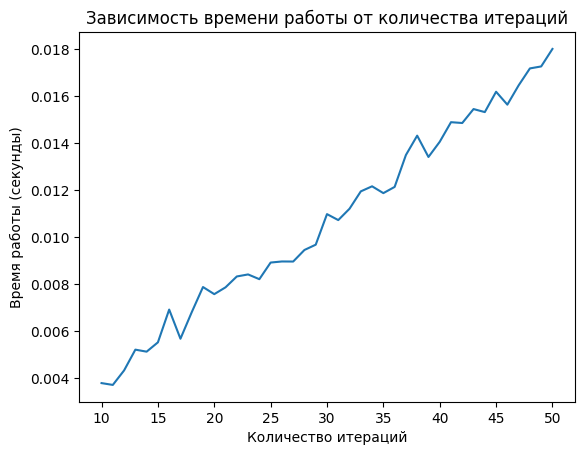

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg as la
import math

def pade_approximation(A, k, m):
    n = A.shape[0]
    p = np.zeros((n, n), dtype=complex)
    q = np.zeros((n, n), dtype=complex)
    factorial = math.factorial

    for j in range(k + 1):
        p += (factorial(k + m - j) * factorial(k)) / (factorial(k + m) * factorial(k - j) * factorial(j)) * np.linalg.matrix_power(A, j)
    for j in range(m + 1):
        q += (factorial(k + m - j) * factorial(m)) / (factorial(k + m) * factorial(m - j) * factorial(j)) * np.linalg.matrix_power(-A, j)

    return np.linalg.solve(q, p)



def matrix_exponential(A, k=4, m=4):
    norm = np.linalg.norm(A, ord=2)
    s = 0
    while norm / (2**s) > 1:
        s += 1

    scaled_A = A / (2**s)
    approx = pade_approximation(scaled_A, k, m)

    for _ in range(s):
        approx = approx @ approx

    return approx

# 1
A = np.array([[1 + 1j, 2 - 1j], [-3, 4j]])
orders = range(1, 11)
errors = []

for order in orders:
  expA_approx = matrix_exponential(A, order, order)
  expA_scipy = la.expm(A)
  error = np.linalg.norm(expA_approx - expA_scipy, ord=2)
  errors.append(error)

plt.plot(orders, errors)
plt.xlabel("Порядок аппроксимации (k + m)")
plt.ylabel("Ошибка (спектральная норма)")
plt.title("Зависимость ошибки от порядка аппроксимации")
plt.semilogy()
plt.show()


# 2
n_values = range(10, 51)
times = []

for n in n_values:
    start_time = time.time()
    for _ in range(n):
        A = np.random.uniform(-1, 1, (2, 2))
        matrix_exponential(A)
    end_time = time.time()
    times.append(end_time - start_time)

plt.plot(n_values, times)
plt.xlabel("Количество итераций")
plt.ylabel("Время работы (секунды)")
plt.title("Зависимость времени работы от количества итераций")
plt.show()

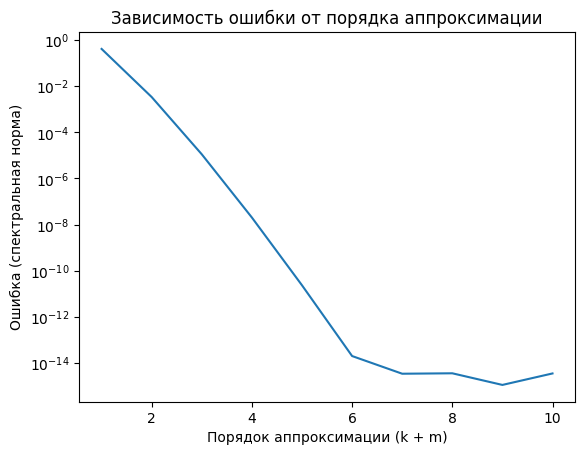

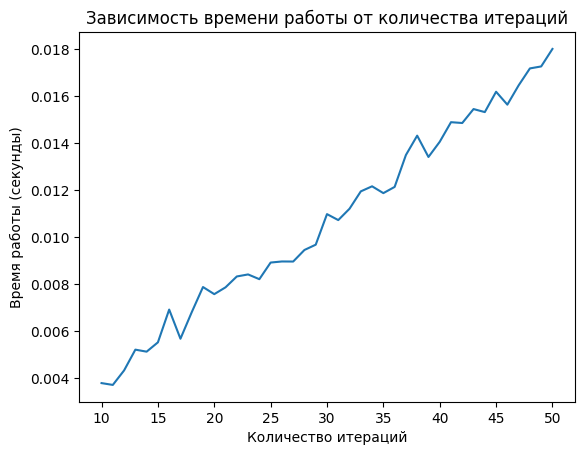

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg as la
import math

def pade_approximation(A, k, m):
    n = A.shape[0]
    p = np.zeros((n, n), dtype=complex)
    q = np.zeros((n, n), dtype=complex)
    factorial = math.factorial

    for j in range(k + 1):
        p += (factorial(k + m - j) * factorial(k)) / (factorial(k + m) * factorial(k - j) * factorial(j)) * np.linalg.matrix_power(A, j)
    for j in range(m + 1):
        q += (factorial(k + m - j) * factorial(m)) / (factorial(k + m) * factorial(m - j) * factorial(j)) * np.linalg.matrix_power(-A, j)

    return np.linalg.solve(q, p)



def matrix_exponential(A, k=4, m=4):
    norm = np.linalg.norm(A, ord=2)
    s = 0
    while norm / (2**s) > 1:
        s += 1

    scaled_A = A / (2**s)
    approx = pade_approximation(scaled_A, k, m)

    for _ in range(s):
        approx = approx @ approx

    return approx

# 1
A = np.array([[1 + 1j, 2 - 1j], [-3, 4j]])
orders = range(1, 11)
errors = []

for order in orders:
  expA_approx = matrix_exponential(A, order, order)
  expA_scipy = la.expm(A)
  error = np.linalg.norm(expA_approx - expA_scipy, ord=2)
  errors.append(error)

plt.plot(orders, errors)
plt.xlabel("Порядок аппроксимации (k + m)")
plt.ylabel("Ошибка (спектральная норма)")
plt.title("Зависимость ошибки от порядка аппроксимации")
plt.semilogy()
plt.show()


# 2
n_values = range(10, 51)
times = []

for n in n_values:
    start_time = time.time()
    for _ in range(n):
        A = np.random.uniform(-1, 1, (2, 2))
        matrix_exponential(A)
    end_time = time.time()
    times.append(end_time - start_time)

plt.plot(n_values, times)
plt.xlabel("Количество итераций")
plt.ylabel("Время работы (секунды)")
plt.title("Зависимость времени работы от количества итераций")
plt.show()

10 примеров экспонент, матриц, собственных векторов и чисел:
Матрица A:
[[34.74336284  0.13560646]
 [-1.62727747 33.79411765]]
Собственные векторы P:
[[ 1  1]
 [-3 -4]]
Собственные числа D:
[[34.33654347  0.        ]
 [ 0.         34.20093702]]
Вычисленная экспонента exp(A):
[[ 1.12768896e+15+0.j  1.03594778e+14+0.j]
 [-1.24313733e+15+0.j  4.02525515e+14+0.j]]
Точная экспонента exp(A):
[[ 1.12768897e+15  1.03594779e+14]
 [-1.24313734e+15  4.02525518e+14]]
--------------------
Матрица A:
[[31.14455772 -9.74660438]
 [ 0.81221703 36.83007694]]
Собственные векторы P:
[[ 4  3]
 [-1 -1]]
Собственные числа D:
[[33.58120882  0.        ]
 [ 0.         34.39342585]]
Вычисленная экспонента exp(A):
[[-1.05885583e+15+0.j -5.77072481e+15+0.j]
 [ 4.80893734e+14+0.j  2.30740031e+15+0.j]]
Точная экспонента exp(A):
[[-1.05885584e+15 -5.77072487e+15]
 [ 4.80893739e+14  2.30740033e+15]]
--------------------
Матрица A:
[[34.25365068 -7.59867756]
 [ 0.         32.35398129]]
Собственные векторы P:
[[1 4]
 [0

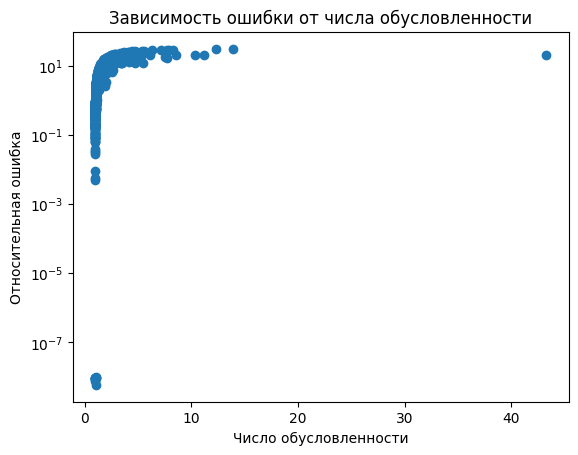

In [2]:
# 3
def generate_special_matrices(num_matrices=1000):
    matrices = []
    eigenvalues_list = []
    eigenvectors_list = []

    for _ in range(num_matrices):
        while True:
            eigen1 = np.log(np.random.randint(1, 1e15))
            eigen2 = np.log(np.random.randint(1, 1e15))

            # Целочисленные вектора с определителем 1
            a = np.random.randint(-5, 6)
            b = np.random.randint(-5, 6)
            c = np.random.randint(-5, 6)
            d = np.random.randint(-5, 6)
            
            if a*d - b*c == 0:
                continue
            
            if abs(a*d - b*c) != 1:
                continue

            P = np.array([[a, b], [c, d]])
            D = np.array([[eigen1, 0], [0, eigen2]])
            A = P @ D @ np.linalg.inv(P)

            if np.all(np.isfinite(A)): 
              matrices.append(A)
              eigenvalues_list.append(D)
              eigenvectors_list.append(P)
              break

    return matrices, eigenvalues_list, eigenvectors_list


matrices, eigenvalues, eigenvectors = generate_special_matrices()

# 4
print("10 примеров экспонент, матриц, собственных векторов и чисел:")
for i in range(10):
    A = matrices[i]
    P = eigenvectors[i]
    D = eigenvalues[i]

    expA = matrix_exponential(A)
    exact_expA = P @ np.diag(np.exp(np.diag(D))) @ np.linalg.inv(P)
    
    print(f"Матрица A:\n{A}")
    print(f"Собственные векторы P:\n{P}")
    print(f"Собственные числа D:\n{D}")
    print(f"Вычисленная экспонента exp(A):\n{expA}")
    print(f"Точная экспонента exp(A):\n{exact_expA}")
    print("-" * 20)


# 5
errors = []
condition_numbers = []

for A in matrices:
    expA_approx = matrix_exponential(A)
    P = np.array([[1, 0], [0, 1]])
    eigenvalues = np.linalg.eig(A)[0]
    D = np.diag(eigenvalues)

    exact_expA = P @ np.diag(np.exp(np.diag(D))) @ np.linalg.inv(P) if np.linalg.det(P) != 0 else la.expm(A)
    relative_error = np.linalg.norm(expA_approx - exact_expA, ord=2) / np.linalg.norm(exact_expA, ord=2)
    errors.append(relative_error)
    condition_numbers.append(np.linalg.cond(A))

plt.scatter(condition_numbers, errors)
plt.xlabel("Число обусловленности")
plt.ylabel("Относительная ошибка")
plt.title("Зависимость ошибки от числа обусловленности")
plt.semilogy()
plt.show()

## Задача 2. Регуляризация и регрессия, метод наименьших квадратов и SVD (4 балла).


Пусть функция $f(x,y)$ задана таблицей своих значений в узлах на квадрате $0 <= x <= 1; 0 <= y <= 1$ с шагом $0.01$ (проще говоря, таблицей чисел 101 на 101).

$$
f(x,y) = sin(x) \cdot cos(y) \cdot \ln(x+y+1)
$$

1. Вычислите таблицу, сделайте её SVD преобразование как матрицы, постройте график убывания сингулярных чисел в зависимости от номера сингулярного числа.

2. Оставьте только 10 самых больших сингулярных значений, и постройте приближение матрицы с помощью матрицы ранга 10. После этого визуализируйте две матрицы - исходную и малоранговую.

3. Вычислите ошибку аппроксимации по спектральной норме.  

4. Приблизьте таблицу функции $g(x,y) = sin(x) \cdot cos(y) $ матрицей второго ранга и вычислите ошибку аппроксимации. Визуализируйте обе матрицы.

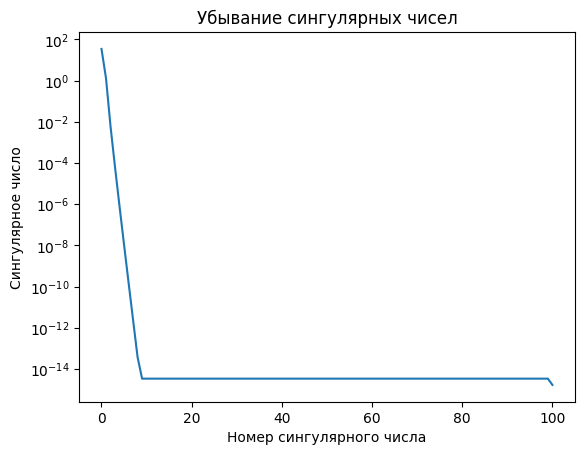

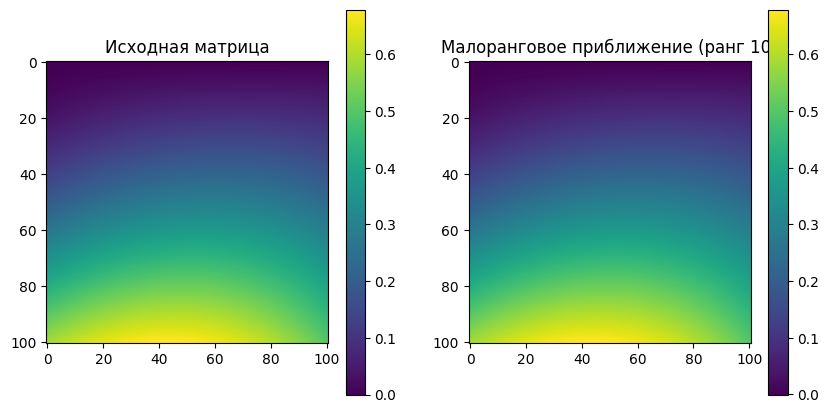

Ошибка аппроксимации (спектральная норма): 1.1939891552983983e-14


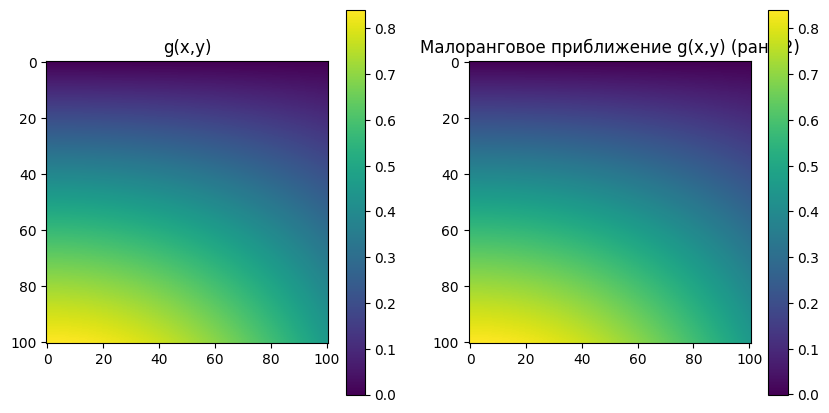

Ошибка аппроксимации g(x,y) (спектральная норма): 1.0986159092324336e-14


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

# 1
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
f = np.zeros((101, 101))
for i in range(101):
    for j in range(101):
        f[i, j] = np.sin(x[i]) * np.cos(y[j]) * np.log(x[i] + y[j] + 1)

U, s, V = svd(f)

plt.plot(s)
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Сингулярное число")
plt.title("Убывание сингулярных чисел")
plt.yscale("log") 
plt.show()


# 2
s_approx = np.zeros(len(s))
s_approx[:10] = s[:10]
f_approx = U @ np.diag(s_approx) @ V


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(f, cmap='viridis')
plt.title("Исходная матрица")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(f_approx, cmap='viridis')
plt.title("Малоранговое приближение (ранг 10)")
plt.colorbar()
plt.show()

# 3
error = np.linalg.norm(f - f_approx, ord=2)
print(f"Ошибка аппроксимации (спектральная норма): {error}")


# 4
g = np.zeros((101, 101))
for i in range(101):
    for j in range(101):
        g[i, j] = np.sin(x[i]) * np.cos(y[j])

U_g, s_g, V_g = svd(g)
s_g_approx = np.zeros(len(s_g))
s_g_approx[:2] = s_g[:2]
g_approx = U_g @ np.diag(s_g_approx) @ V_g


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(g, cmap='viridis')
plt.title("g(x,y)")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(g_approx, cmap='viridis')
plt.title("Малоранговое приближение g(x,y) (ранг 2)")
plt.colorbar()
plt.show()

error_g = np.linalg.norm(g - g_approx, ord=2)
print(f"Ошибка аппроксимации g(x,y) (спектральная норма): {error_g}")

## Задача 3. Решение нелинейных уравнений и поиск минимума функций. (3 балла).

Для нелинейной системы уравнений

$$
\begin{aligned}
& x^2+y^2=4 \\
& y=x^{10}
\end{aligned}
$$

Прежде чем выбирать начальное приближение, можете приближенно локализовать корни этой системы вручную.

1.  Решить методом Ньютона.
2.  Предложить для решения сходящийся метод простой итерации и решить с помощью него.
3. Сравнить эффективность методов, реализованных в первых двух пунктах - построить графики зависимости точности от количества итераций.

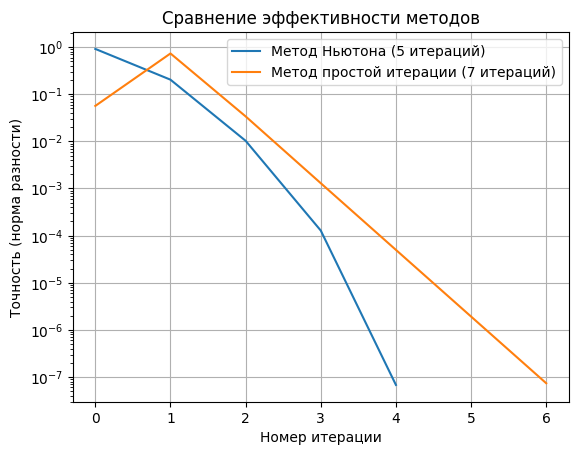

Решение методом Ньютона: [1.05446142 1.69944435]
Решение методом простой итерации: [1.05446142 1.69944435]


In [4]:
import numpy as np
import matplotlib.pyplot as plt


def F(x):
    return np.array([
        x[0]**2 + x[1]**2 - 4,
        x[1] - x[0]**10
    ])

def J(x):
    return np.array([
        [2*x[0], 2*x[1]],
        [-10*x[0]**9, 1]
    ])

def newton_method(F, J, x0, tol=1e-6, max_iter=100):
    x = x0
    errors = []
    for i in range(max_iter):
        delta_x = np.linalg.solve(J(x), -F(x))
        x = x + delta_x
        error = np.linalg.norm(delta_x)
        errors.append(error)
        if error < tol:
            return x, errors, i + 1
    return x, errors, max_iter

# 2
def simple_iteration_method(x0, tol=1e-6, max_iter=100):
    def G(x):
        return np.array([
            (4 - x[0]**2)**(1.0/20.0),
            x[0]**10
        ])

    x = x0.copy()

    errors = []
    for i in range(max_iter):
        x_next = G(x)
        error = np.linalg.norm(x_next - x)
        errors.append(error)
        x = x_next
        if error < tol:
            return x, errors, i+1
    return x, errors, max_iter

# Начальное приближение
x0 = np.array([1.0, 1.0])

x_newton, errors_newton, iterations_newton = newton_method(F, J, x0)
x_simple, errors_simple, iterations_simple = simple_iteration_method(x0)



# 3
plt.plot(errors_newton, label=f"Метод Ньютона ({iterations_newton} итераций)")
plt.plot(errors_simple, label=f"Метод простой итерации ({iterations_simple} итераций)")
plt.xlabel("Номер итерации")
plt.ylabel("Точность (норма разности)")
plt.title("Сравнение эффективности методов")
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

print(f"Решение методом Ньютона: {x_newton}")
print(f"Решение методом простой итерации: {x_simple}")